# PART 1: EXPLORE DATA:



In [28]:
#Import library,data

import pandas as pd 
import numpy as np
from scipy.stats import uniform
from sklearn.model_selection import ParameterSampler
import matplotlib.pyplot as plt

data=pd.read_csv('menu.csv')
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [29]:
#Info of data

data.info()

#As we can see data dont have missing value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

# PART 2: SOME INTERESTED QUESTIONS 



## QUESTION 1: How many calories does average McDonald's calories value meal contain?:



### 1.1/ Split data into two foods and one drink section:



In [30]:
#Build food_list and  and drink_list to split data later:
print('LIST OF UNIQUE CATEGORY IN DATA:')
print(data['Category'].unique(),"\n") 

#We choose food_list as below then the remain is drink_list

food_list=['Breakfast','Chicken & Fish','Beef & Pork','Desserts','Salads',
       'Snacks & Sides' ]

drink_list=[item for item in data['Category'].unique() if item not in food_list]
print('FOOD_LIST IN CATEGORY:')
print(food_list,"\n")
print('DRINK_LIST IN CATEGORY:')
print(drink_list)

LIST OF UNIQUE CATEGORY IN DATA:
['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes'] 

FOOD_LIST IN CATEGORY:
['Breakfast', 'Chicken & Fish', 'Beef & Pork', 'Desserts', 'Salads', 'Snacks & Sides'] 

DRINK_LIST IN CATEGORY:
['Beverages', 'Coffee & Tea', 'Smoothies & Shakes']


In [31]:
#Split data item into food and drink section:

food_section=[data['Item'].iloc[i] for i,item in enumerate(data['Category']) if item in food_list ]
drink_section=[data['Item'].iloc[i] for i,item in enumerate(data['Category']) if item in drink_list ]
print("LIST OF FOOD NAME IN FOOD_LIST :")
print(food_section,"\n")
print("LIST OF DRINK NAME IN DRINK_LIST :")
print(drink_section)

LIST OF FOOD NAME IN FOOD_LIST :
['Egg McMuffin', 'Egg White Delight', 'Sausage McMuffin', 'Sausage McMuffin with Egg', 'Sausage McMuffin with Egg Whites', 'Steak & Egg McMuffin', 'Bacon, Egg & Cheese Biscuit (Regular Biscuit)', 'Bacon, Egg & Cheese Biscuit (Large Biscuit)', 'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)', 'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)', 'Sausage Biscuit (Regular Biscuit)', 'Sausage Biscuit (Large Biscuit)', 'Sausage Biscuit with Egg (Regular Biscuit)', 'Sausage Biscuit with Egg (Large Biscuit)', 'Sausage Biscuit with Egg Whites (Regular Biscuit)', 'Sausage Biscuit with Egg Whites (Large Biscuit)', 'Southern Style Chicken Biscuit (Regular Biscuit)', 'Southern Style Chicken Biscuit (Large Biscuit)', 'Steak & Egg Biscuit (Regular Biscuit)', 'Bacon, Egg & Cheese McGriddles', 'Bacon, Egg & Cheese McGriddles with Egg Whites', 'Sausage McGriddles', 'Sausage, Egg & Cheese McGriddles', 'Sausage, Egg & Cheese McGriddles with Egg Wh

### 1.2/ Generate a data with 1000 customers(1000 orders) with these three attributes:



In [32]:
#Build param_grid,which include 3 combine ,2 foods from food_section and 1 drink from drink_section

param_grid={'first_food':food_section,
            'second_food':food_section,
            'drink':drink_section}

#Generated RANDOM 1000 customers which each is combine from 2 foods and 1 drink ,THIS IS WILL BE DAILY MEAL:

from sklearn.model_selection import ParameterSampler
rng = np.random.RandomState(0)
n_iter=1000
param_list = list(ParameterSampler(param_grid, n_iter=n_iter,random_state=rng))

In [33]:
#Let create a combine DAILY MEAL data frame: 

combine_daily_df=pd.DataFrame(param_list,columns=['first_food','second_food','drink'])

combine_daily_df

#As you can see now we have 1000 customers and their combine of foods and drink for DAILY MEAL

,first_food,second_food,drink
0,Big Breakfast with Egg Whites (Regular Biscuit),Sausage McGriddles,Minute Maid Orange Juice (Large)
1,Premium McWrap Southwest Chicken (Crispy Chicken),Southern Style Crispy Chicken Sandwich,Blueberry Pomegranate Smoothie (Small)
2,Chicken McNuggets (40 piece),Big Breakfast with Hotcakes (Large Biscuit),Dr Pepper (Medium)
3,Bacon Buffalo Ranch McChicken,Sausage Biscuit with Egg Whites (Large Biscuit),Nonfat Caramel Mocha (Large)
4,Bacon Clubhouse Grilled Chicken Sandwich,Premium McWrap Southwest Chicken (Grilled Chic...,Diet Dr Pepper (Small)
...,...,...,...
995,Jalapeño Double,Chipotle BBQ Snack Wrap (Grilled Chicken),Coca-Cola Classic (Child)
996,Premium Bacon Ranch Salad (without Chicken),Big Breakfast (Large Biscuit),Dr Pepper (Small)
997,Chicken McNuggets (4 piece),Chocolate Chip Cookie,Coca-Cola Classic (Large)
998,Oatmeal Raisin Cookie,Big Breakfast (Regular Biscuit),Blueberry Pomegranate Smoothie (Medium)


### 1.3/ Merge with original data to obtain calories attributes:



In [34]:
#Create a data_frame just include CALORIES_NUTRITIONS and ITEM for merging:

calories_df=data[['Item','Calories']]

item_list=['first_food','second_food','drink'] # THIS IS FROM GENERATED DATA

#We will using for loop for 3times TO merge :

     #Each time we merge each combine's columns for calories_df which contain orginal Calories of orginal data
     
     #We also drop 'Item' columns on the right side for each loop cause its redudant
     
     #Finally we rename the merge columns on right side by give suffix C_{} for Calories of each combine


for item in item_list:
    combine_daily_df=pd.merge(combine_daily_df,calories_df,how='left',left_on=item,right_on='Item').\
                drop('Item',axis=1).rename(columns={'Calories':'Calories_{}'.format(item)})

combine_daily_df.head()

,first_food,second_food,drink,Calories_first_food,Calories_second_food,Calories_drink
0,Big Breakfast with Egg Whites (Regular Biscuit),Sausage McGriddles,Minute Maid Orange Juice (Large),640,420,280
1,Premium McWrap Southwest Chicken (Crispy Chicken),Southern Style Crispy Chicken Sandwich,Blueberry Pomegranate Smoothie (Small),670,430,220
2,Chicken McNuggets (40 piece),Big Breakfast with Hotcakes (Large Biscuit),Dr Pepper (Medium),1880,1150,190
3,Bacon Buffalo Ranch McChicken,Sausage Biscuit with Egg Whites (Large Biscuit),Nonfat Caramel Mocha (Large),430,520,370
4,Bacon Clubhouse Grilled Chicken Sandwich,Premium McWrap Southwest Chicken (Grilled Chic...,Diet Dr Pepper (Small),590,520,0


In [35]:
#Insert new columns of combine DataFrame to calculated total Calories of each meal:

combine_daily_df['Total_Calories']=combine_daily_df[['Calories_first_food','Calories_second_food','Calories_drink']].apply(np.sum,axis=1)
combine_daily_df.head()

,first_food,second_food,drink,Calories_first_food,Calories_second_food,Calories_drink,Total_Calories
0,Big Breakfast with Egg Whites (Regular Biscuit),Sausage McGriddles,Minute Maid Orange Juice (Large),640,420,280,1340
1,Premium McWrap Southwest Chicken (Crispy Chicken),Southern Style Crispy Chicken Sandwich,Blueberry Pomegranate Smoothie (Small),670,430,220,1320
2,Chicken McNuggets (40 piece),Big Breakfast with Hotcakes (Large Biscuit),Dr Pepper (Medium),1880,1150,190,3220
3,Bacon Buffalo Ranch McChicken,Sausage Biscuit with Egg Whites (Large Biscuit),Nonfat Caramel Mocha (Large),430,520,370,1320
4,Bacon Clubhouse Grilled Chicken Sandwich,Premium McWrap Southwest Chicken (Grilled Chic...,Diet Dr Pepper (Small),590,520,0,1110


THE AVERAGE CALORIES McDonalds(Assume) DAILY MEAL CONTAIN IS : 1222.625


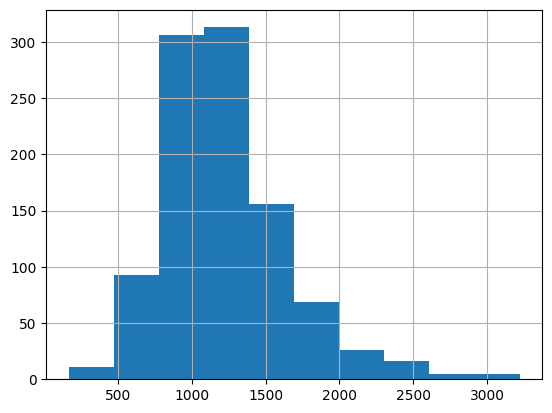

In [36]:
#Now we plot hist to performnce the Total Calories in each meal and 
        #Calculated the mean Total_calories in each meal

combine_daily_df['Total_Calories'].hist()

print('THE AVERAGE CALORIES McDonalds(Assume) DAILY MEAL CONTAIN IS : {}'.format(combine_daily_df['Total_Calories'].mean()))

#This is done for Question 1:

### So all we just did is one time generate 1000 orders it maybe not so convince, we can do that procedure 1000 times:

THE AVERAGE CALORIES McDonalds(Assume) DAILY MEAL CONTAIN FOR 1000 TIMES LOOP IS : 1223.799605


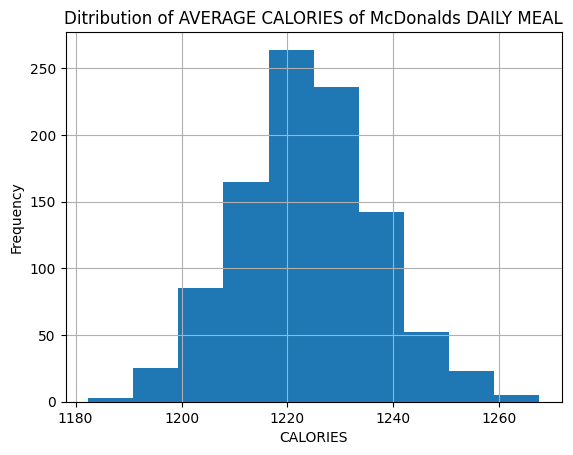

In [37]:
# So as we did above is just for 1 random data generate we create to caculated the average calories for McDonalds DAILY MEAL:

# Now we can do as above , but let say 1000 times then we caculated total calories at each time then we calculated average of THESE column 
#(AVERAGE OF 1000 TIMES ), After that we will plot the hist plot and CALCULATED THE AVERAGE OF (1000 TIMES AVEARAGE COLUMN) TO OBTAIN THE 
# AVEARAGE OF THE MCDONALDS DAILY MEAL

#LET USING LOOP 1000 TIMES AND COMBINE ALL WE JUST DID ABOVE TO DO THIS :
loop_sum_column=np.repeat(0,1000)

for loops in range(1000):
    #Build param_grid,which include 3 combine ,2 foods from food_section and 1 drink from drink_section
    param_grid={'first_food':food_section,
            'second_food':food_section,
            'drink':drink_section}

    #Generated RANDOM 1000 customers which each is combine from 2 foods and 1 drink ,THIS IS WILL BE DAILY MEAL:
    n_iter=1000
    param_list = list(ParameterSampler(param_grid, n_iter=n_iter))
    
    combine_daily_df=pd.DataFrame(param_list,columns=['first_food','second_food','drink'])
    calories_df=data[['Item','Calories']]
    item_list=['first_food','second_food','drink']
    for item in item_list:
        combine_daily_df=pd.merge(combine_daily_df,calories_df,how='left',left_on=item,right_on='Item').\
                drop('Item',axis=1).rename(columns={'Calories':'Calories_{}'.format(item)})
        
    combine_daily_df['Total_Calories']=combine_daily_df[['Calories_first_food','Calories_second_food','Calories_drink']].apply(np.sum,axis=1)
    loop_sum_column=loop_sum_column+combine_daily_df['Total_Calories'].values

#Then we average for 1000 times loop
loop_sum_column=loop_sum_column/1000

#Final we create plot and AVERAGE VALUEL:
combine_daily_df['Total_Calories']=loop_sum_column
combine_daily_df['Total_Calories'].hist()
plt.title('Ditribution of AVERAGE CALORIES of McDonalds DAILY MEAL')
plt.ylabel('Frequency')
plt.xlabel('CALORIES')

print('THE AVERAGE CALORIES McDonalds(Assume) DAILY MEAL CONTAIN FOR 1000 TIMES LOOP IS : {}'.format(combine_daily_df['Total_Calories'].mean()))
   
    

## QUESTION 2: How much do beverages, like soda or coffee, contribute to the overall caloric intake of each meal?



Text(0, 0.5, 'Frequency of percent')

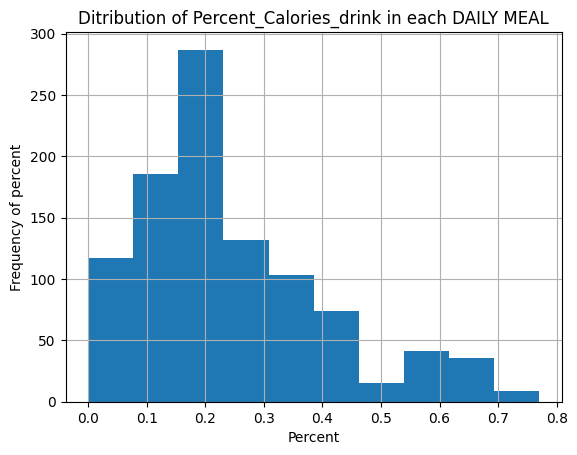

In [38]:

#Answer of question 2 really Straight forward after we have answered Question 1:

#Percent Calories_drink(Calories) contribution in overall calories

combine_daily_df['Percent_Calories_drink']=round(combine_daily_df['Calories_drink']/combine_daily_df['Total_Calories'],2)
combine_daily_df['Percent_Calories_food']=1-combine_daily_df['Percent_Calories_drink']

#Distribution of Percent_Calories_drink in each DAILY MEAL:

combine_daily_df['Percent_Calories_drink'].hist()
plt.title('Ditribution of Percent_Calories_drink in each DAILY MEAL')
plt.xlabel('Percent')
plt.ylabel('Frequency of percent')

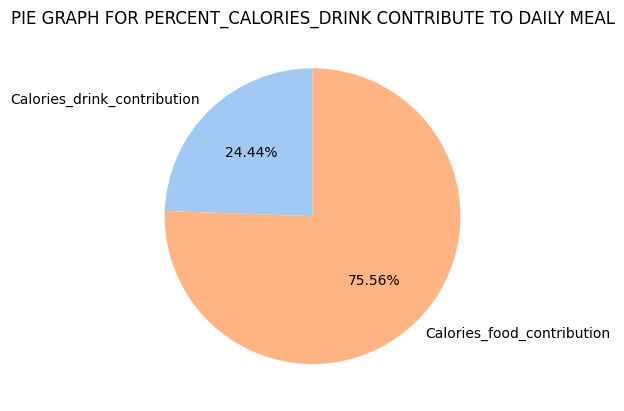

In [39]:
#Lets plot the pie graph for pecent Calories_drink and Calories_food for each DAILY MEAL:

Calories_drink_contribution=combine_daily_df['Percent_Calories_drink'].mean()
Calories_food_contribution=combine_daily_df['Percent_Calories_food'].mean()
import matplotlib.pyplot as plt
import seaborn as sns
labels=['Calories_drink_contribution','Calories_food_contribution']

colors = sns.color_palette('pastel')[0:2]
sizes=[Calories_drink_contribution,Calories_food_contribution]
plt.pie(sizes,
        labels=labels,
        colors=colors,
        startangle=90,
        autopct='%.2f%%')
plt.title('PIE GRAPH FOR PERCENT_CALORIES_DRINK CONTRIBUTE TO DAILY MEAL')
plt.show()

## QUESTION 3: Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value? 



### 3.1/ First we will import re module, then match sandwich word in [Item column] of original data



In [40]:
#import the re module enables us to use regular expressions.
import re
Swords=re.compile("[Ss]andwich") # Match all upper or lower case of 'S' in sandwich word
index=[]
for i in range(len(data)):
    if Swords.findall(data['Item'][i])!=[]:
        index.append(i)

check_section=data[data.index.isin(index)]

#Double check on Category:

print(check_section['Category'].unique())

#So just section 'Chicken & Fish' section in Category column is contain sandwich 

#Base on what we did above sandwich section into  Chiken and fish section,so we filter Chicken and Fish section first


#Chicken&Fish section:
c_fish_section=data[data['Category']=='Chicken & Fish']

#Then we filter which Item is sandwich in Item column:


sandwich_section=c_fish_section.iloc[[i for i in range(len(c_fish_section['Item']))\
                                    if c_fish_section['Item'].iloc[i].find('Sandwich')>0]]

sandwich_section.reset_index(inplace=True)
sandwich_section.drop('index',axis=1,inplace=True)
sandwich_section.insert(loc=0,column='Index',value=sandwich_section.index)
sandwich_section.head()


['Chicken & Fish']


/var/folders/qq/n0f3w4yn6294s50sn7ddg6zm0000gn/T/ipykernel_1482/1740625693.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandwich_section.drop('index',axis=1,inplace=True)


,Index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,...,55,18,3,13,10,24,4,6,15,20
1,1,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,...,42,14,3,13,8,28,4,8,15,20
2,2,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,...,58,19,3,14,11,36,8,20,30,20
3,3,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,...,44,15,3,13,9,40,8,20,30,20
4,4,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,...,57,19,3,13,11,32,4,20,15,20


In [41]:
sandwich_section.head()


,Index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,...,55,18,3,13,10,24,4,6,15,20
1,1,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,...,42,14,3,13,8,28,4,8,15,20
2,2,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,...,58,19,3,14,11,36,8,20,30,20
3,3,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,...,44,15,3,13,9,40,8,20,30,20
4,4,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,...,57,19,3,13,11,32,4,20,15,20


### 3.2/ After this,We create a data which contain:

#### A columns with will contain 'Crispy' or 'Grilled' which extract from Item column, 
#### Then create a Tag_name which is the name of food in Item column after extract,
#### And one is index :We will need this Index for attach nutrition into data later (Cause nutrition on sandwich_section)

In [42]:
Tag_name=[]
Index=[]
Cat=[]
grouping=['Crispy','Grilled'] #We can do this at the same time

for ele in grouping : #Each time we split each grouping element
    for i in range(len(sandwich_section)): #loop each index of sandwich_section
        cut=sandwich_section['Item'].iloc[i].find(ele) #Cut point by find 
        if cut>0:
            head=sandwich_section['Item'].iloc[i][:cut].strip() 
            tail=sandwich_section['Item'].iloc[i][cut+len(ele):].strip()
            combine=head+' '+tail
            Tag_name.append(combine) #Each loop add combine to Tag_name
            Index.append(i) #Add index
            Cat.append(ele) #Add group
        
#Create df dataframe which contain index,category and Tag_name

df={'Index':Index,'Cat':Cat,'Tag_name':Tag_name}
df=pd.DataFrame(df)

df

,Index,Cat,Tag_name
0,0,Crispy,Premium Chicken Classic Sandwich
1,2,Crispy,Premium Chicken Club Sandwich
2,4,Crispy,Premium Chicken Ranch BLT Sandwich
3,6,Crispy,Bacon Clubhouse Chicken Sandwich
4,8,Crispy,Southern Style Chicken Sandwich
5,1,Grilled,Premium Chicken Classic Sandwich
6,3,Grilled,Premium Chicken Club Sandwich
7,5,Grilled,Premium Chicken Ranch BLT Sandwich
8,7,Grilled,Bacon Clubhouse Chicken Sandwich


### 3.3 / Next step time to using Index columns to assign nutrition from sandwich_section DataFrame to df:



In [43]:
#I choose ['Sugars','Protein','Vitamin_A,'Vitamin_C','Calcium','Iron'] as nutrition 

Choose_name=['Index','Sugars','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)',
             'Calcium (% Daily Value)','Iron (% Daily Value)']

df=pd.merge(df,sandwich_section[Choose_name],on='Index',how='inner')

#Let rename columns for short:

df.rename(columns={'Vitamin A (% Daily Value)':'Vitamin_A',
                   'Vitamin C (% Daily Value)':'Vitamin_C',
                    'Calcium (% Daily Value)':'Calcium',
                    'Iron (% Daily Value)':'Iron'},inplace=True)

df



,Index,Cat,Tag_name,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium,Iron
0,0,Crispy,Premium Chicken Classic Sandwich,10,24,4,6,15,20
1,2,Crispy,Premium Chicken Club Sandwich,11,36,8,20,30,20
2,4,Crispy,Premium Chicken Ranch BLT Sandwich,11,32,4,20,15,20
3,6,Crispy,Bacon Clubhouse Chicken Sandwich,16,36,8,25,30,15
4,8,Crispy,Southern Style Chicken Sandwich,7,21,4,2,15,15
5,1,Grilled,Premium Chicken Classic Sandwich,8,28,4,8,15,20
6,3,Grilled,Premium Chicken Club Sandwich,9,40,8,20,30,20
7,5,Grilled,Premium Chicken Ranch BLT Sandwich,9,36,4,20,15,20
8,7,Grilled,Bacon Clubhouse Chicken Sandwich,14,40,8,30,30,15


### 3.4/ Calculate total nutrition:



In [44]:
#Let Drop index column which now is redudant
df=df.drop('Index',axis=1)

#And build multiple index dataframe by this:

df.set_index(['Tag_name','Cat'],inplace=True)

#Calculated total nutrition on columns dimension after build multiple index:

df['Nutrition']=df.sum(axis=1)

df

,,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium,Iron,Nutrition
Tag_name,Cat,,,,,,,
Premium Chicken Classic Sandwich,Crispy,10,24,4,6,15,20,79
Premium Chicken Club Sandwich,Crispy,11,36,8,20,30,20,125
Premium Chicken Ranch BLT Sandwich,Crispy,11,32,4,20,15,20,102
Bacon Clubhouse Chicken Sandwich,Crispy,16,36,8,25,30,15,130
Southern Style Chicken Sandwich,Crispy,7,21,4,2,15,15,64
Premium Chicken Classic Sandwich,Grilled,8,28,4,8,15,20,83
Premium Chicken Club Sandwich,Grilled,9,40,8,20,30,20,127
Premium Chicken Ranch BLT Sandwich,Grilled,9,36,4,20,15,20,104
Bacon Clubhouse Chicken Sandwich,Grilled,14,40,8,30,30,15,137


In [45]:
#Chosing just df['Nutrition'] columns for new df, index now is Tag_name and Cat like u see above
    
df=pd.DataFrame(df['Nutrition'])
df

,,Nutrition
Tag_name,Cat,
Premium Chicken Classic Sandwich,Crispy,79
Premium Chicken Club Sandwich,Crispy,125
Premium Chicken Ranch BLT Sandwich,Crispy,102
Bacon Clubhouse Chicken Sandwich,Crispy,130
Southern Style Chicken Sandwich,Crispy,64
Premium Chicken Classic Sandwich,Grilled,83
Premium Chicken Club Sandwich,Grilled,127
Premium Chicken Ranch BLT Sandwich,Grilled,104
Bacon Clubhouse Chicken Sandwich,Grilled,137


### 3.5/ Use unstack and stack to transform the df data into right format for plot graph:



In [46]:
#This is at stack form So we need using unstack() to give it to right format 

df=df.unstack()
df

Nutrition        
Cat                                   Crispy Grilled
Tag_name                                            
Bacon Clubhouse Chicken Sandwich       130.0   137.0
Premium Chicken Classic Sandwich        79.0    83.0
Premium Chicken Club Sandwich          125.0   127.0
Premium Chicken Ranch BLT Sandwich     102.0   104.0
Southern Style Chicken Sandwich         64.0     NaN

In [47]:
#As you can see we have Nan in Tag_name 'Southern Style Chicken Sandwich' cause it dont have grilled value
    #So we need to drop it 

df.dropna(inplace=True)
df

Nutrition        
Cat                                   Crispy Grilled
Tag_name                                            
Bacon Clubhouse Chicken Sandwich       130.0   137.0
Premium Chicken Classic Sandwich        79.0    83.0
Premium Chicken Club Sandwich          125.0   127.0
Premium Chicken Ranch BLT Sandwich     102.0   104.0

### 3.6/ Plot graph and make conclusion:



Text(0.5, 1.0, 'Amount of nutrition of Crispy Sandwich compare with Grilled Sandwich')

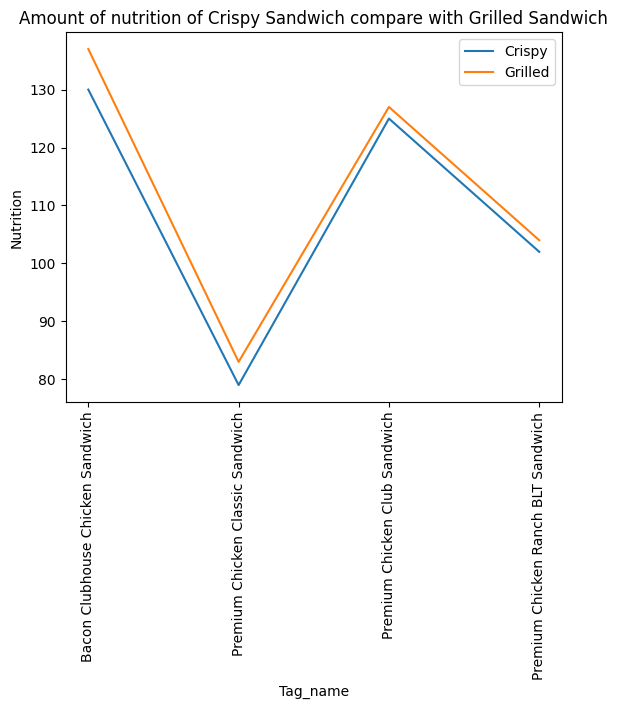

In [48]:
#We have df and its form is just right, all we need to graph the plot to compare the different between
    #Cripy and Grilled Sandwich

plt.plot(df.index,df['Nutrition'])
plt.ylabel('Nutrition')
plt.xlabel('Tag_name')
plt.xticks(rotation=90)
plt.legend(df.columns.levels[1])
plt.title('Amount of nutrition of Crispy Sandwich compare with Grilled Sandwich')

#As you can see Grilled is more nutrition tha Crispy sandwich

## PART 3: OPTIMIZATION THE DAILY MEAL OF MCDONALD'S MENU



In [49]:
#QUESTION :What is the least number of items could you order from the menu  to meet one day's nutritional requirements

#Import linprog from scipy.optimize for LP problem:

from scipy.optimize import  linprog

# Cause Sugars and Protein here is gram, we will transform it into percent 
        
#Here I take 100 percent of Sugars_Daily  as 50 gram
data['Sugars (% Daily Value)']=round(100*data['Sugars']/50,0)   #PERCENT 
#And 100 percent of Protein_Daily as 60 gram
data['Protein (% Daily Value)']=round(100*data['Protein']/60,0) #PERCENT

#Here I convert Calories into percent to and i set 100 percent of Calories_Daily is 2000
data['Calories (% Daily Value)']=round(100*data['Calories']/2000,0) #PERCENT

#We also want the optimization solution at least have drink in the combination by following code:

data['drink_check']=[1  if data['Category'].iloc[i] in drink_list else 0 for i in range(len(data))]

In [50]:
#List all Attributes columns of optimize problem:

Attributes=['Total Fat (% Daily Value)','Saturated Fat (% Daily Value)',
              'Cholesterol (% Daily Value)','Sodium (% Daily Value)',
               'Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)'
               ,'Protein (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)',
                    'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Sugars (% Daily Value)',
                    'Calories (% Daily Value)','drink_check']

#Transpose the original data to have A_matrix form:

A_matrix=data[Attributes].to_numpy() #Extract form from the original data nxp dimensions
A_matrix=A_matrix.transpose() # A_matrix transpose pxn dimensions

#Set upper bound condition

con1=np.repeat(100,len(Attributes)) #100 upper bound for each

con1=np.array([75 if Attributes[i]=='Calories (% Daily Value)' else 70 if Attributes[i]=='Sugars (% Daily Value)' 
        else 3 if Attributes[i]=='drink_check' else con1[i] for i in range(len(Attributes))])

# 75  upper bound for  Calories , 70 uppoer bound for Sugars , 3 upper bound for drink_check

#Set lower bound condition

con2=np.repeat(40,len(Attributes)) # 40 lower bound for each  

con2=np.array([70 if Attributes[i]=='Protein (% Daily Value)'  else 1 if Attributes[i]=='drink_check' 
      else con2[i] for i in range(len(Attributes))]) # 70 lower bound for Protein, 1 lower bound for drink_check cause we want at least 1 drink

#Concatenate two condition which lower bound need to modified into negative
con=np.concatenate((con1,-con2,np.repeat(1,len(data))))  #which dimension is 1x(2len(con1))

#concatenate A_matrix which lower bound need to modified into negative
A=np.concatenate((A_matrix,-A_matrix,np.identity(len(data)))) # which dimension is (2*row(A_matrix)* col(A_matrix))


In [51]:
#Set up objection function coef and lhs_ineq, rhs_ineq in linprog:

obj=np.repeat(1,len(data))
integral=np.repeat(1,len(data)) # Here we want our solution natural so we seta

lhs_ineq=A
rhs_ineq=con
opt=linprog(c=obj,A_ub=lhs_ineq,b_ub=rhs_ineq,integrality=integral,
            method='highs')

#Note here default xi bound 's condition is >=0 and <Inf
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 4.0
              x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            nit: -1
          lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.400e+01  1.000e+00 ...  1.000e+00
                              1.000e+00]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
 mip_node_count: 1
 mip_dual_bound: 4.0
        mip_gap: 0.0

In [52]:
#Get optimize_combine from index of opt.x>0
print(np.where(opt.x>0)) #Index of which opt.x>0
optimize_combine=data.iloc[np.where(opt.x>0)]

#Calculated total Calories of this optimization combination:""

print('Total Calories of optimize_combine is {} '.format(optimize_combine['Calories'].sum()))

#So as you can see our optimize orders to meet daily nutrition requirements (Which i assume) is :
print('Optimized orders to meat daily nutrxition requirements is:{}'.format(optimize_combine['Item'].values))

optimize_combine


(array([ 58,  72, 103, 208]),)
Total Calories of optimize_combine is 1290 
Optimized orders to meat daily nutrxition requirements is:['Premium Grilled Chicken Classic Sandwich'
 'Premium McWrap Chicken & Ranch (Crispy Chicken)' 'Baked Apple Pie'
 'Iced Coffee with Sugar Free French Vanilla Syrup (Small)']


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugars (% Daily Value),Protein (% Daily Value),Calories (% Daily Value),drink_check
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,...,8,28,4,8,15,20,16.0,47.0,18.0,0
72,Chicken & Fish,Premium McWrap Chicken & Ranch (Crispy Chicken),10.9 oz (310 g),610,280,31.0,47,8.0,40,0.5,...,8,27,60,15,20,20,16.0,45.0,30.0,0
103,Desserts,Baked Apple Pie,2.7 oz (77 g),250,110,13.0,19,7.0,35,0.0,...,13,2,4,25,2,6,26.0,3.0,12.0,0
208,Coffee & Tea,Iced Coffee with Sugar Free French Vanilla Syr...,16 fl oz cup,80,40,4.5,7,3.0,15,0.0,...,1,1,4,0,4,0,2.0,2.0,4.0,1
